# Capstone frame work

## Checklist
1. Look at the big picture.
Used in Real world applications like manufacturing, engineering, and production.
2. Get the data.
ImageNet is widelly available on the internet.
3. Explore and visualize the data to gain insights.
1000 classification with given labels.
4. Prepare the data for machine learning algorithms.
Resized the images to fit the training and validation requrments.
5. Select a model and train it.
Trained a baseline model.
6. Fine-tune your model.
Using transfer learning to train new model. 
7. Present your solution.

8. Launch, monitor, and maintain your system.

## 1. Look at the big picture.
### Frame the Problem and look at the Big Picture

1. Define the objective in business terms.

Defect objects to help in manufacturing.

2. How will your solution be used.

It can be useful to detect objects in a path. For Quality Assurance and control.

3. What are the current solution/workarounds(if any)?

For example in pharmaceutical bottel filling stations.
Currently a single image is taken while stopping the production line of a bottel and being compared to a single image. This take time and efficiency reduction. CCN can be used to analyze these productucts without stopping the production line.  

4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

This is a suppervised model. Completely offline.

5. How should performance be measured?

The performace will be measured using accuracy a low accuracy for real world data is acceptable. Also, there are several classes to predict performance. Therefore, if the model can detect objects in a picture accurately then it can be used in production.

6. Is the performance measure aligned with the business objective?

Yes. Even incremental improvemnt in the current process achives the business objective. 

7. What would be the minimum performance needed to reach the business objective?

The minimum performance need to reach the business objective is for the production line to run smoothly. 

8. What are comparable problem? Can you reuse experience or tool?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions if possible.
12. Verify assumptions if possible.


![image.png](attachment:image.png)

https://blog.paperspace.com/yolov8-a-revolutionary-advancement-in-object-detection-2/

## 2. Get the Data

Note: Automate as much as possible so you can easily get fresh data.

1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and authorization if necessary.
5. Get access authorizations.
6. Create a workspace(with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manioulate ( without changing the data itself).
9. Ensure sensitive information is deleted or protected(e.g., anonymized).
10 Check the size and type of the data ( time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!).


About the data :

We collect a large real-world test set, ObjectNet, for object recognition with controls
where object backgrounds, rotations, and imaging viewpoints are random. Most
scientific experiments have controls, confounds which are removed from the data,
to ensure that subjects cannot perform a task by exploiting trivial correlations in
the data. Historically, large machine learning and computer vision datasets have
lacked such controls. This has resulted in models that must be fine-tuned for new
datasets and perform better on datasets than in real-world applications. When
tested on ObjectNet, object detectors show a 40-45% drop in performance, with
respect to their performance on other benchmarks, due to the controls for biases.
Controls make ObjectNet robust to fine-tuning showing only small performance
increases. We develop a highly automated platform that enables gathering datasets
with controls by crowdsourcing image capturing and annotation. ObjectNet is
the same size as the ImageNet test set (50,000 images), and by design does not
come paired with a training set in order to encourage generalization. The dataset
is both easier than ImageNet – objects are largely centered and unoccluded – and
harder, due to the controls. Although we focus on object recognition here, data
with controls can be gathered at scale using automated tools throughout machine
learning to generate datasets that exercise models in new ways thus providing
valuable feedback to researchers. This work opens up new avenues for research
in generalizable, robust, and more human-like computer vision and in creating
datasets where results are predictive of real-world performance

https://objectnet.dev/objectnet-a-large-scale-bias-controlled-dataset-for-pushing-the-limits-of-object-recognition-models.pdf

## 3. Explore the Data

1. Create a copy of the data for explration ( sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
       - Name
       - Type( Categorical, int/float, bounded/unbounded, text. structured, etc.)
       - % of missing values
       - Noisiness and type of noise(stochastic, outliers, rounding errors, etc.)
       - Usefulness for the task
       - Type of distribution ( Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful.
10. Document what you have learned.


Datasets are of central importance to computer vision and more broadly machine learning. Particularly
with the advent of techniques that are less well understood from a theoretical point of view, raw
performance on datasets is now the major driver of new developments and the major feedback about
the state of the field.

## 4. Prepare the Data



Note:
    - Work on copies of the data (keep the original dataset intect).
    - This note might not be valid for image data. 


![image.png](attachment:image.png)

In [42]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#TF
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import  cifar10
from tensorflow.keras.models import load_model

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Importing image
import glob
import random
from PIL import Image
import numpy as np

#Transfer Learning
import os
import shutil
import json

from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras import layers, models, regularizers

#Image genrator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Data Readin 


In [43]:
dataset = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images',  # Correct path
    labels="inferred",
    label_mode="categorical",
    color_mode='rgb',
    subset='training',
    validation_split=0.2,
    batch_size=12,
    image_size=(224, 224),
    shuffle=True,
    interpolation="bilinear",
    seed=42,
    follow_links=False
).map(lambda x, y: (x/224, y))


Found 25000 files belonging to 5 classes.
Using 20000 files for training.


In [44]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images',
    labels="inferred",
    label_mode="categorical",
    #class_names=None,# list of strings
    color_mode='rgb',
    batch_size=12,
    image_size=(224, 224),
    shuffle=True,
    validation_split=0.2,
    seed=42,
    subset="validation",
    interpolation="bilinear",
    follow_links=False

).map(lambda x, y: (x/224, y))

Found 25000 files belonging to 5 classes.
Using 5000 files for validation.


Data Exploration

In [45]:
for x, y in dataset:
    break

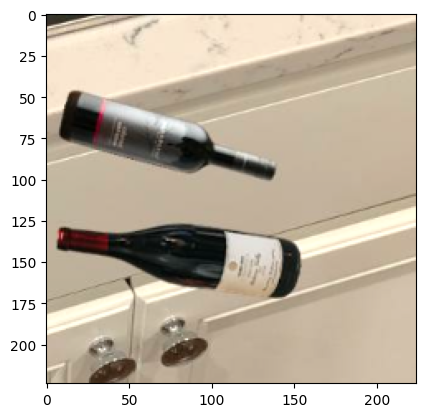

In [46]:
plt.imshow(x[10]);

Base Model

In [51]:
# Base Model
model = Sequential([
    Conv2D(64, (7, 7), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='sigmoid')  # Adjust the number of units based on the number of classes
])


In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 218, 218, 64)      9472      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 109, 109, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 107, 107, 128)     73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 105, 105, 128)     147584    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 52, 52, 128)       0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 346112)           

In [53]:
# Compile the base model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
# Fit the base model
#model.fit(dataset, epochs=10, validation_data=val_ds)

In [55]:
#model.save('BaseObjmodelV17')

In [56]:
#VGG16 below

In [57]:
# VGG16 base
conv_base = VGG16(
    weights='imagenet',
    include_top=False
)

# Make the layers non-trainable 
for layer in conv_base.layers:
    layer.trainable = False

In [58]:
# Get a summary of the model 
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [59]:
# Fuctional using VGG16 base 
inputs = keras.Input(shape=(224, 224, 3))
x = inputs
x = keras.applications.vgg16.preprocess_input(x) # Preprocess the data for vgg16
x = conv_base(x) 
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [60]:
# Compile 
model.compile(
    loss='categorical_crossentropy', #sparse_categorical_crossentropy if not categorical in traing data
    optimizer='rmsprop',
    metrics=['acc']
)

In [61]:
#model.fit(dataset, validation_data=val_ds, epochs=45)

In [62]:
#model.summary()

![image.png](attachment:image.png)

In [64]:
#model.save('ObjmodelVGG16V17')

In [66]:
#model.save('ObjmodelVGG16V17keras.keras')

In [67]:
#model.save('ObjmodelVGG16V17.h5')

In [63]:
# manually iterate over the dataset and retrieve batches of images
for image_batch, labels_batch in dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(12, 224, 224, 3)
(12, 5)


In [65]:
#model.predict('/kaggle/input/imagenet-object-localization-challenge/ILSVRC/Data/CLS-LOC/test/ILSVRC2012_test_00000002.JPEG')

Accuracy of model has not increased significantly. Let's try EfficientNet.

In [68]:
# An older version of EfficientNet
input_shape = (224, 224, 3)
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False, 
    weights="imagenet", 
    input_shape=input_shape, 
    pooling='max'
)

base_model.trainable = False
x = base_model(x, training=False)
x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

x = layers.Dense(
    256, 
    kernel_regularizer=regularizers.l2(l=0.016), 
    activity_regularizer=regularizers.l1(0.006),
    bias_regularizer=regularizers.l1(0.006), 
    activation='relu'
)(x)

x = layers.Dropout(rate=0.45)(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization_2 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 256)               327936    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 5)                 1285

In [69]:
#history = model.fit(x= dataset, epochs= 45, verbose= 1, validation_data= val_ds,validation_steps= None, shuffle= False)

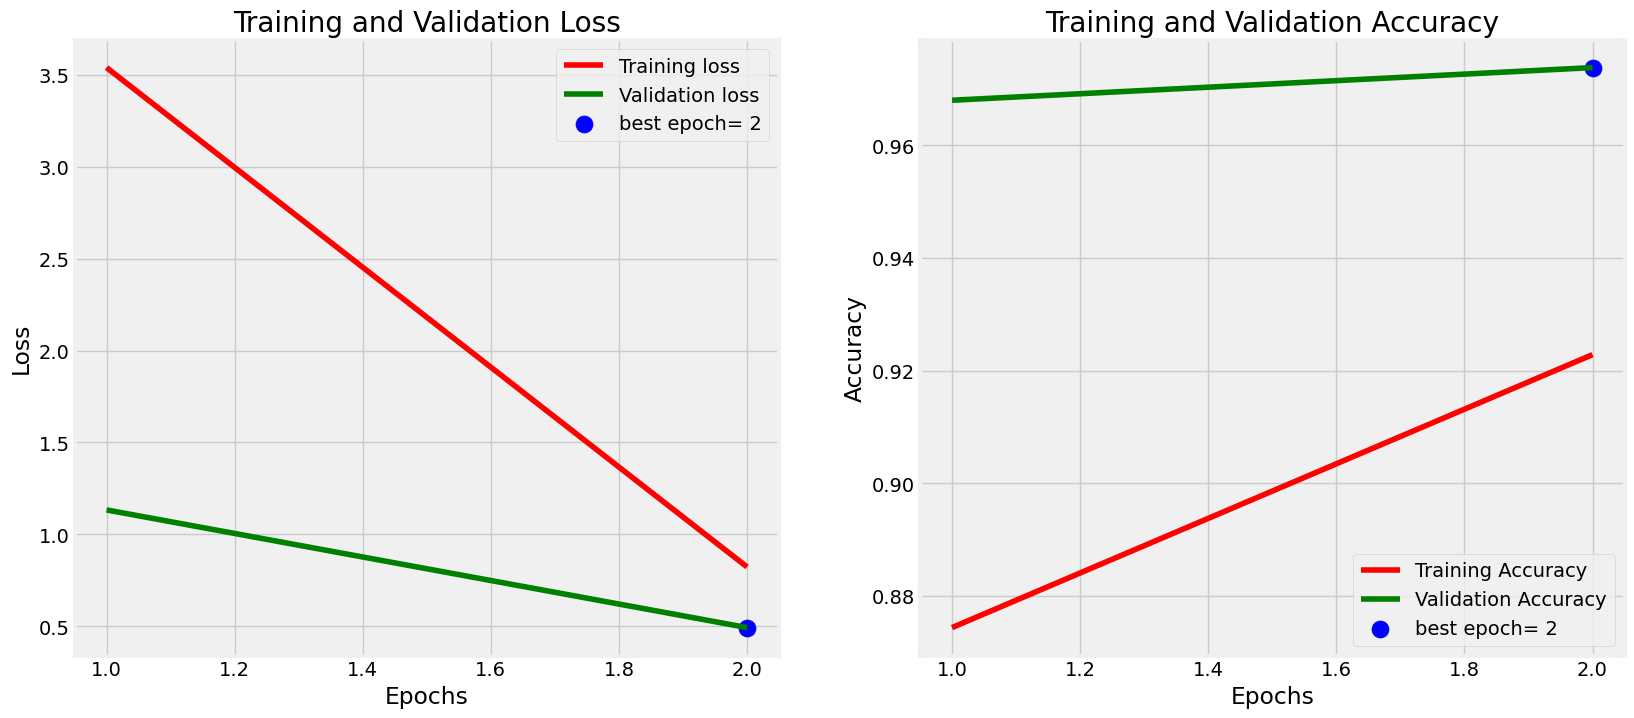

In [70]:
# Define 

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot 

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [71]:
model.save('EfficientNetObjmodelV15.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


with image data generator

Using data genrator to improve accuracy 

In [1]:
# Using Image Data Generator
train_datagen = ImageDataGenerator(validation_split=0.2)

NameError: name 'ImageDataGenerator' is not defined

In [ ]:
dataset = train_datagen.flow_from_directory(
    '/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images',
    target_size=(224, 224),
    batch_size=12,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)
val_ds = train_datagen.flow_from_directory(
    '/kaggle/input/bottle-synthetic-images-dataset/Bottle Images/Bottle Images',
    target_size=(224, 224),
    batch_size=12,
    class_mode='categorical',
    subset='validation', 
    shuffle=True,
    seed=42
)


In [ ]:
for x, y in dataset:
    break

In [ ]:
plt.imshow(x[1]);

Agumenting the data as well

In [72]:

data_aug = keras.models.Sequential([
    RandomFlip('horizontal_and_vertical', input_shape=(224, 224, 3)),
    RandomRotation(0.2),
    RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
])

In [73]:
input_shape = (224,224, 3)
inputs = tf.keras.Input(shape=input_shape)
aug = data_aug(inputs)
preprocess = tf.keras.applications.efficientnet.preprocess_input(aug)
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False, 
    weights="imagenet", 
    input_shape=input_shape, 
    pooling='max'
)

base_model.trainable = False

# ###### Sequential ######
# model = Sequential([
#     base_model,
#     BatchNormalization(axis=-1, momentum = 0.99, epsilon=0.001),
#     Dense(256, kernel_regularizer= regularizers.l2(l=0.016),
#          activity_regularizer=regularizers.l1(0.006),
#          bias_regularizer=regularizers.l1(0.006),
#          activation="relu"),
#     Dropout(rate=0.45, seed=123),
#     Dense(5, activation="softmax")
# ])
# ########################


#baseoutput = base_model(preprocess, training=False)
baseoutput = base_model(aug, training=False)
#baseoutput = base_model(training=False)
baseoutputnormed = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(baseoutput)

base_output_normed_dense = layers.Dense(
    256, 
    kernel_regularizer=regularizers.l2(l=0.016), 
    activity_regularizer=regularizers.l1(0.006),
    bias_regularizer=regularizers.l1(0.006), 
    activation='relu'
)(baseoutputnormed)

base_output_normed_dense_drop = layers.Dropout(rate=0.45)(base_output_normed_dense)
outputs = layers.Dense(5, activation='softmax')(base_output_normed_dense_drop)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization_3 (Bat  (None, 1280)              5120      
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 256)               327936    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0   

In [74]:
history = model.fit(x= dataset, epochs= 50, verbose= 1, validation_data= val_ds,
                     shuffle= False)

Epoch 1/50
1667/1667 [==============================] - 104s 58ms/step - loss: 3.4880 - accuracy: 0.8731 - val_loss: 1.0951 - val_accuracy: 0.9682
Epoch 2/50
1667/1667 [==============================] - 80s 48ms/step - loss: 0.8040 - accuracy: 0.9250 - val_loss: 0.4896 - val_accuracy: 0.9700
Epoch 3/50
1667/1667 [==============================] - 82s 49ms/step - loss: 0.5448 - accuracy: 0.9261 - val_loss: 0.3948 - val_accuracy: 0.9730
Epoch 4/50
1667/1667 [==============================] - 80s 48ms/step - loss: 0.4870 - accuracy: 0.9284 - val_loss: 0.3596 - val_accuracy: 0.9770
Epoch 5/50
1667/1667 [==============================] - 78s 47ms/step - loss: 0.4613 - accuracy: 0.9333 - val_loss: 0.3454 - val_accuracy: 0.9772
Epoch 6/50
1667/1667 [==============================] - 81s 49ms/step - loss: 0.4480 - accuracy: 0.9322 - val_loss: 0.3276 - val_accuracy: 0.9758
Epoch 7/50
1667/1667 [==============================] - 80s 48ms/step - loss: 0.4366 - accuracy: 0.9338 - val_loss: 0.3342 

In [96]:
model.save('FinalmodelV17.h5')

In [95]:
model.save('Finalmodel17.keras')

In [97]:
model.save('FinalmodelV17')

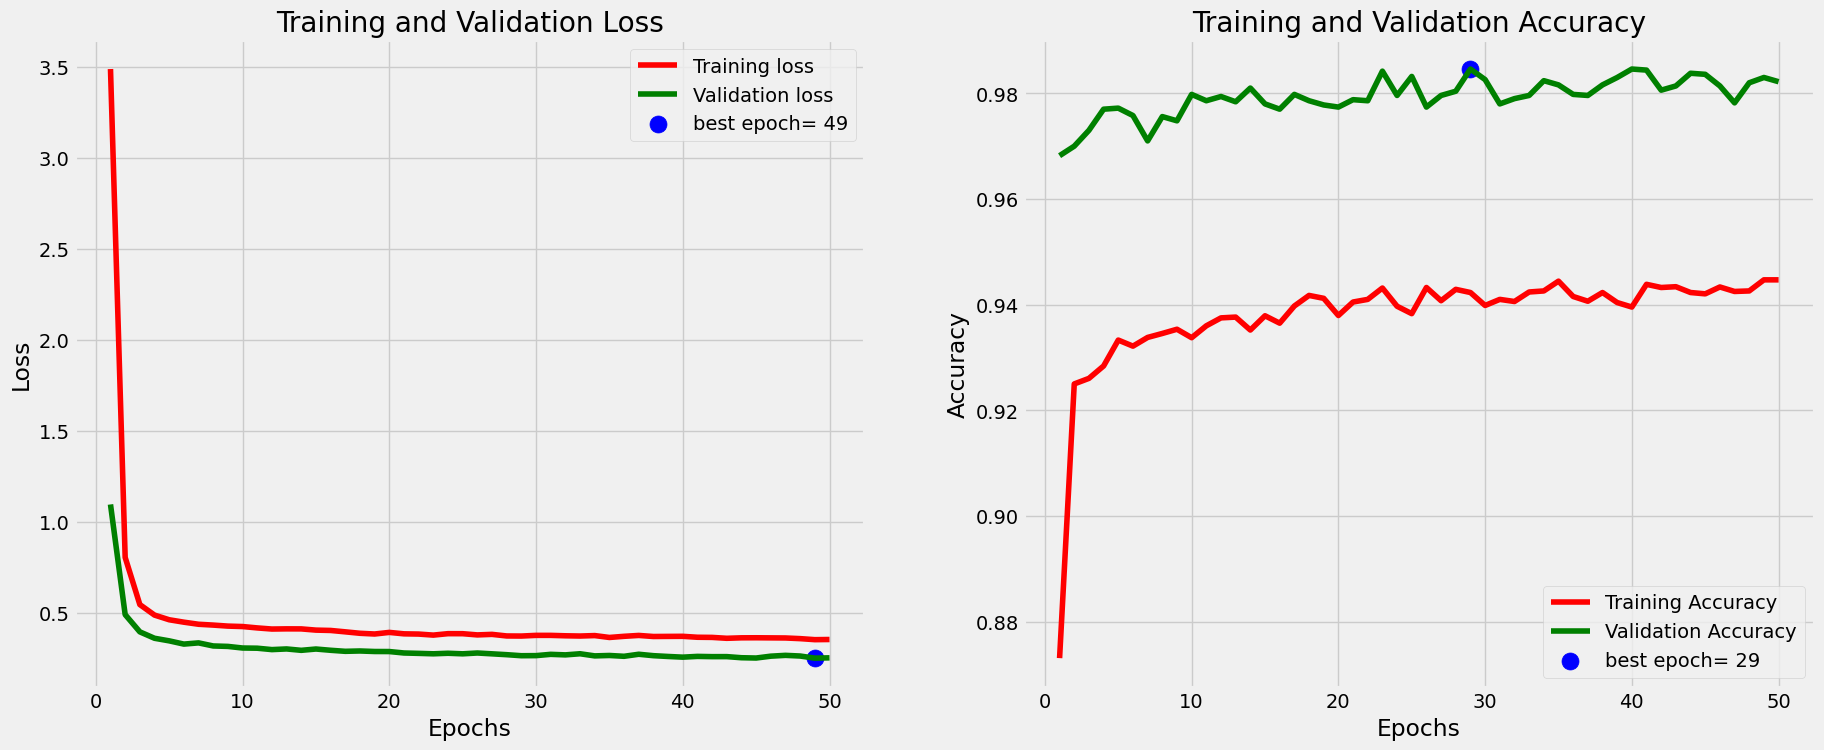

In [77]:
# Define 

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot 
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [78]:
model.save('EfficientNetEpoc100ObjmodelV15.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluate model

In [80]:
ts_length = len(val_ds)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

NameError: name 'train_gen' is not defined

In [94]:
# Load and preprocess an image 
img_path = '/kaggle/input/testing-with-real-bottels/WIN_20231130_19_27_15_Pro.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Create a batch
img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)  # Preprocess the image

# Predict 
predictions = model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 26ms/step
Predicted class: [1]


In [105]:
# Calculate the appropriate batch sizes and steps for each dataset
def calculate_batch_size_and_steps(dataset, max_batch_size=80):
    dataset_length = len(dataset)
    batch_size = max(sorted([dataset_length // n for n in range(1, dataset_length + 1) if dataset_length % n == 0 and dataset_length / n <= max_batch_size]))
    steps = dataset_length // batch_size
    return batch_size, steps

# Calculate for train, validation, and test datasets
train_batch_size, train_steps = calculate_batch_size_and_steps(train_gen)
valid_batch_size, valid_steps = calculate_batch_size_and_steps(valid_gen)
test_batch_size, test_steps = calculate_batch_size_and_steps(test_gen)

# Evaluate the model on each dataset
train_score = model.evaluate(train_gen, steps=train_steps, verbose=1)
valid_score = model.evaluate(valid_gen, steps=valid_steps, verbose=1)
test_score = model.evaluate(test_gen, steps=test_steps, verbose=1)

# Print the results
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


ValueError: max() arg is an empty sequence